In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [18]:
df = pd.read_excel("facebook_features.xlsx")
df = df.drop(["Unnamed: 0"],axis=1)
df.head()

,Author,Out degree,Katz centr,Frequency,Inactivity_Inertia,Posts similarity,Target Subscribers,Subscribers,Emotion,Total Posts,Commentary percentage,Visiting coefficient
0,"""Європейська Україна""",2,0.007028,0.000081,0.226993,0.680074,4.028149,3.569140,0.375000,8,0.000000,0.125000
1,0512.com.ua - сайт города Николаева,1,0.006389,0.000076,0.222689,0.534414,4.196425,4.196425,0.142857,7,0.000000,0.000000
2,"0532.ua - сайт міста Полтави - новини, афіша, ...",1,0.006389,0.000077,0.207548,0.595434,4.144419,4.144419,0.142857,7,0.142857,0.000000
3,"05366.com.ua - новости, афиша, справочник пред...",1,0.006389,0.000676,0.038196,0.318691,3.679519,3.679519,0.375000,32,0.000000,0.000000
4,0564.ua - Сайт города Кривого Рога,2,0.007028,0.000429,0.096866,0.544309,4.532544,4.539139,0.217391,23,0.000000,0.043478


#### Scale out degree

In [19]:
df["Out degree"] = np.log2(df["Out degree"])
df["Out degree"] = (df["Out degree"] - df["Out degree"].mean())/df["Out degree"].std()

In [20]:
df.head()

,Author,Out degree,Katz centr,Frequency,Inactivity_Inertia,Posts similarity,Target Subscribers,Subscribers,Emotion,Total Posts,Commentary percentage,Visiting coefficient
0,"""Європейська Україна""",-0.160832,0.007028,0.000081,0.226993,0.680074,4.028149,3.569140,0.375000,8,0.000000,0.125000
1,0512.com.ua - сайт города Николаева,-1.054124,0.006389,0.000076,0.222689,0.534414,4.196425,4.196425,0.142857,7,0.000000,0.000000
2,"0532.ua - сайт міста Полтави - новини, афіша, ...",-1.054124,0.006389,0.000077,0.207548,0.595434,4.144419,4.144419,0.142857,7,0.142857,0.000000
3,"05366.com.ua - новости, афиша, справочник пред...",-1.054124,0.006389,0.000676,0.038196,0.318691,3.679519,3.679519,0.375000,32,0.000000,0.000000
4,0564.ua - Сайт города Кривого Рога,-0.160832,0.007028,0.000429,0.096866,0.544309,4.532544,4.539139,0.217391,23,0.000000,0.043478


In [30]:
#df_features = df.drop(["Author","Total Posts"],axis=1)
df_features = df[["Out degree","Inactivity_Inertia","Posts similarity",
                  "Visiting coefficient"]]
df_features.head()

,Out degree,Inactivity_Inertia,Posts similarity,Visiting coefficient
0,-0.160832,0.226993,0.680074,0.125000
1,-1.054124,0.222689,0.534414,0.000000
2,-1.054124,0.207548,0.595434,0.000000
3,-1.054124,0.038196,0.318691,0.000000
4,-0.160832,0.096866,0.544309,0.043478


## PCA

In [31]:
pca = PCA()
pca.fit(df_features)
print(sum(pca.explained_variance_ratio_[:2]))

0.9737922511058191


So, two components explains more than 90% of variances.

In [32]:
pca = PCA(n_components=2)
components = np.array(pca.fit_transform(df_features))

In [33]:
df["1 component"] = components[:,0]
df["2 component"] = components[:,1]
#df["3 component"] = components[:,2]
df.head()

,Author,Out degree,Katz centr,Frequency,Inactivity_Inertia,Posts similarity,Target Subscribers,Subscribers,Emotion,Total Posts,Commentary percentage,Visiting coefficient,1 component,2 component,cluster
0,"""Європейська Україна""",-0.160832,0.007028,0.000081,0.226993,0.680074,4.028149,3.569140,0.375000,8,0.000000,0.125000,-0.261110,0.425145,4
1,0512.com.ua - сайт города Николаева,-1.054124,0.006389,0.000076,0.222689,0.534414,4.196425,4.196425,0.142857,7,0.000000,0.000000,-1.157330,0.335838,1
2,"0532.ua - сайт міста Полтави - новини, афіша, ...",-1.054124,0.006389,0.000077,0.207548,0.595434,4.144419,4.144419,0.142857,7,0.142857,0.000000,-1.158355,0.337245,1
3,"05366.com.ua - новости, афиша, справочник пред...",-1.054124,0.006389,0.000676,0.038196,0.318691,3.679519,3.679519,0.375000,32,0.000000,0.000000,-1.158775,0.310842,1
4,0564.ua - Сайт города Кривого Рога,-0.160832,0.007028,0.000429,0.096866,0.544309,4.532544,4.539139,0.217391,23,0.000000,0.043478,-0.281086,0.487230,4


In [34]:
df_components = df[["1 component","2 component"]]

### Elbow method

In [35]:
errors = []
n_clusters = range(2,15)

for n in n_clusters:
    model = KMeans(n_clusters=n)
    model.fit(df_components)
    errors.append(model.inertia_)

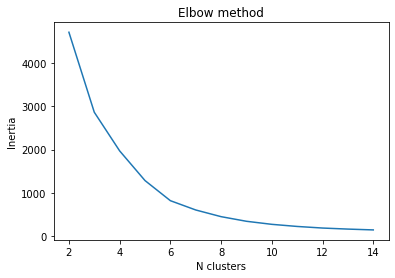

In [36]:
plt.plot(n_clusters,errors)
plt.xlabel("N clusters")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()

In [37]:
n_cluster = 6
model = KMeans(n_clusters=n_cluster)
model.fit(df_components)

predicted = model.predict(df_components)

df["cluster"] = predicted
df.head()

,Author,Out degree,Katz centr,Frequency,Inactivity_Inertia,Posts similarity,Target Subscribers,Subscribers,Emotion,Total Posts,Commentary percentage,Visiting coefficient,1 component,2 component,cluster
0,"""Європейська Україна""",-0.160832,0.007028,0.000081,0.226993,0.680074,4.028149,3.569140,0.375000,8,0.000000,0.125000,-0.261110,0.425145,5
1,0512.com.ua - сайт города Николаева,-1.054124,0.006389,0.000076,0.222689,0.534414,4.196425,4.196425,0.142857,7,0.000000,0.000000,-1.157330,0.335838,0
2,"0532.ua - сайт міста Полтави - новини, афіша, ...",-1.054124,0.006389,0.000077,0.207548,0.595434,4.144419,4.144419,0.142857,7,0.142857,0.000000,-1.158355,0.337245,0
3,"05366.com.ua - новости, афиша, справочник пред...",-1.054124,0.006389,0.000676,0.038196,0.318691,3.679519,3.679519,0.375000,32,0.000000,0.000000,-1.158775,0.310842,0
4,0564.ua - Сайт города Кривого Рога,-0.160832,0.007028,0.000429,0.096866,0.544309,4.532544,4.539139,0.217391,23,0.000000,0.043478,-0.281086,0.487230,5


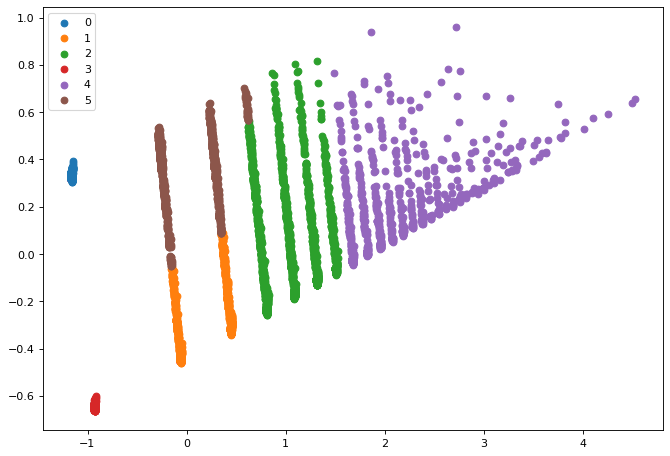

In [41]:
# For 3d
from mpl_toolkits.mplot3d import Axes3D

def plot3d(df,n_cluster):
    fig = plt.figure(figsize=(10, 10), dpi=80)
    ax = fig.add_subplot(111, projection='3d')
    for i in range(n_cluster):
        cluster = df[df["cluster"] == i]
        ax.scatter(cluster["1 component"] , cluster["2 component"] ,cluster["3 component"], label = i)
    plt.legend()

    ax.view_init(15, 10)
    plt.show()
    
def plot2d(df,n_cluster):
    plt.figure(figsize=(10, 7), dpi=80)
    for i in range(n_cluster):
        cluster = df[df["cluster"] == i]
        plt.scatter(cluster["1 component"] , cluster["2 component"], label = i)
    plt.legend()
    plt.show()
    
plot2d(df,n_cluster)

In [42]:
# Relative distribution of clusters
relative = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}
total = len(df)
for c in df["cluster"]:
    relative[c] += 1
    
for c in relative.keys():
    print("cluster "+str(c)+":",relative[c]/total)

cluster 0: 0.2516729969253029
cluster 1: 0.19506239826370048
cluster 2: 0.22879363356845722
cluster 3: 0.1221739916802315
cluster 4: 0.06818592873937421
cluster 5: 0.13411105082293362


In [43]:
suspicious_cluster = df.loc[df["cluster"]==4]
suspicious_cluster

,Author,Out degree,Katz centr,Frequency,Inactivity_Inertia,Posts similarity,Target Subscribers,Subscribers,Emotion,Total Posts,Commentary percentage,Visiting coefficient,1 component,2 component,cluster
38,Aleks Makarov,2.869496,0.019168,0.000791,1.377373e-01,0.568327,4.232595,3.699057,-0.035714,56,0.000000,0.464286,2.764401,0.774878,4
50,Aleksandr Artemov,1.777543,0.011863,0.000176,6.815343e-02,0.425038,4.954433,2.528145,-0.133333,15,0.733333,0.533333,1.718174,0.446852,4
55,Aleksandr Ivshin,2.251448,0.013226,0.013430,8.421438e-05,0.974933,3.527798,3.466274,0.000000,13,0.000000,1.000000,2.278868,0.121120,4
70,Aleksandr Piterman,1.625751,0.010734,0.000087,2.144487e-01,0.608798,4.339734,3.211388,0.111111,9,1.000000,1.000000,1.678944,-0.019589,4
89,Aleksandra d'Boule,1.625751,0.010350,0.001036,8.194982e-03,0.811787,3.591918,2.933993,0.000000,12,0.000000,1.000000,1.672218,-0.028025,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,Юрій Миронко,1.913326,0.016387,0.000372,3.134953e-02,0.355276,5.137977,1.919078,0.117647,17,0.764706,0.823529,1.917099,0.190444,4
10978,Юрій Петрович,2.806618,0.019697,0.000804,2.002696e-01,0.587720,5.531370,0.000000,-0.226667,75,0.680000,0.680000,2.754002,0.557622,4
11008,Яна Гайдученко,2.251448,0.014056,0.001117,2.761160e-09,0.925672,3.985202,3.551450,0.357143,14,0.000000,0.928571,2.262988,0.188165,4
11011,Яна Жураківська,2.519042,0.015015,0.007137,3.195031e-04,0.756045,3.282908,1.612784,0.000000,19,0.000000,1.000000,2.541718,0.172538,4


In [44]:
df = df.drop(["1 component","2 component"],axis=1)
df.to_excel("facebook_clustered.xlsx")
df.head()

,Author,Out degree,Katz centr,Frequency,Inactivity_Inertia,Posts similarity,Target Subscribers,Subscribers,Emotion,Total Posts,Commentary percentage,Visiting coefficient,cluster
0,"""Європейська Україна""",-0.160832,0.007028,0.000081,0.226993,0.680074,4.028149,3.569140,0.375000,8,0.000000,0.125000,5
1,0512.com.ua - сайт города Николаева,-1.054124,0.006389,0.000076,0.222689,0.534414,4.196425,4.196425,0.142857,7,0.000000,0.000000,0
2,"0532.ua - сайт міста Полтави - новини, афіша, ...",-1.054124,0.006389,0.000077,0.207548,0.595434,4.144419,4.144419,0.142857,7,0.142857,0.000000,0
3,"05366.com.ua - новости, афиша, справочник пред...",-1.054124,0.006389,0.000676,0.038196,0.318691,3.679519,3.679519,0.375000,32,0.000000,0.000000,0
4,0564.ua - Сайт города Кривого Рога,-0.160832,0.007028,0.000429,0.096866,0.544309,4.532544,4.539139,0.217391,23,0.000000,0.043478,5
